In [53]:
import utils
import importlib
importlib.reload(utils)

lorenz,time=utils.time_dynamic_system(epoch=3000,delta_t=0.02,system=utils.dynamic_lorenz)
lorenz_x,lorenz_y,lorenz_z=lorenz

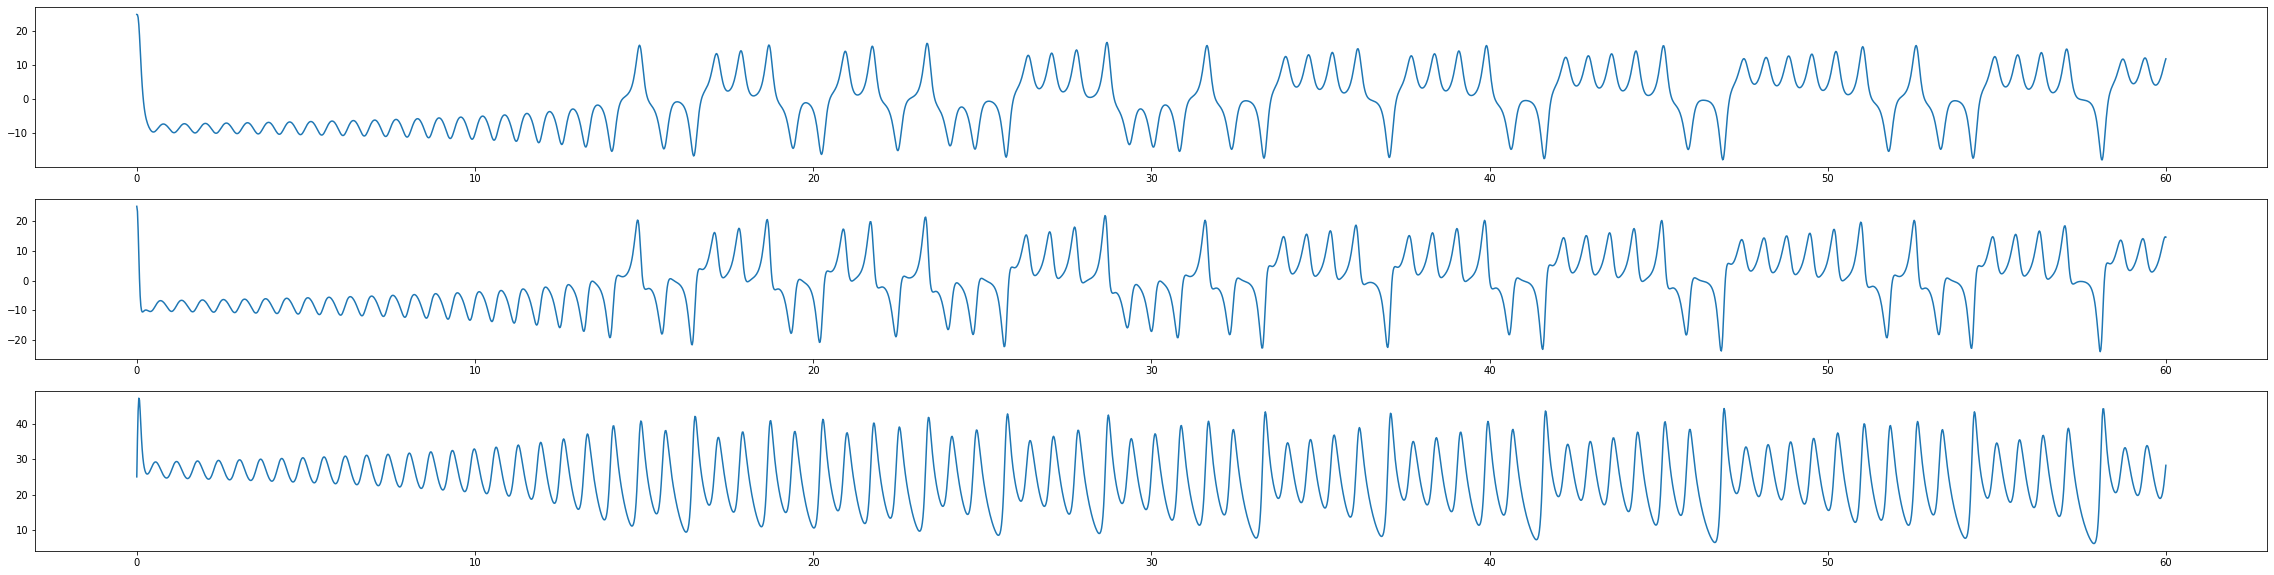

In [54]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_figwidth(40)
fig.set_figheight(10)
plt.subplot(311)
plt.plot(time,lorenz_x)
plt.subplot(312)
plt.plot(time,lorenz_y)
plt.subplot(313)
plt.plot(time,lorenz_z)

plt.show()

In [55]:
import model
importlib.reload(model)

RP = model.reservoirModel('lorenz.config')
print("W_out before_training:\n",RP.W_out)
RP.training()
print("W_out after_training:\n",RP.W_out)

output,_=RP.run_by_self()

forced_output,_ = RP.run_with_input()


W_out before_training:
 tensor([[0.4167, 0.0191, 0.6310],
        [0.7831, 0.4592, 0.9806],
        [0.2891, 0.6375, 0.4749],
        ...,
        [0.3606, 0.6790, 0.2490],
        [0.9553, 0.7378, 0.5431],
        [0.1197, 0.5203, 0.1438]], dtype=torch.float64)


/home/bfish/projects/reservoir2/model.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(self.system_input[epoch])
/home/bfish/projects/reservoir2/model.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(torch.tensor(np.tanh(torch.tensor(np.dot(self.W_reservoir,prev))+torch.tensor(feed_to_reservoir))))
/home/bfish/projects/reservoir2/model.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reference_outputs = torch.tensor(self.system_input[1:self.training_time+1])
/home/bfish/projects/reserv

W_out after_training:
 tensor([[-0.0183, -0.0135, -0.0578],
        [-0.0888, -0.0399,  0.1257],
        [ 0.0238,  0.0036,  0.0618],
        ...,
        [ 0.0366, -0.1267,  0.3921],
        [ 0.0891, -0.0433, -0.2682],
        [ 0.0644,  0.0683, -0.0344]], dtype=torch.float64)


/tmp/ipykernel_52160/524581809.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(output),torch.tensor(lorenz).T,time,3)
/home/bfish/projects/reservoir2/utils.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  error=np.linalg.norm(torch.tensor(prediction[i])-torch.tensor(reference))/np.linalg.norm(torch.tensor(reference))


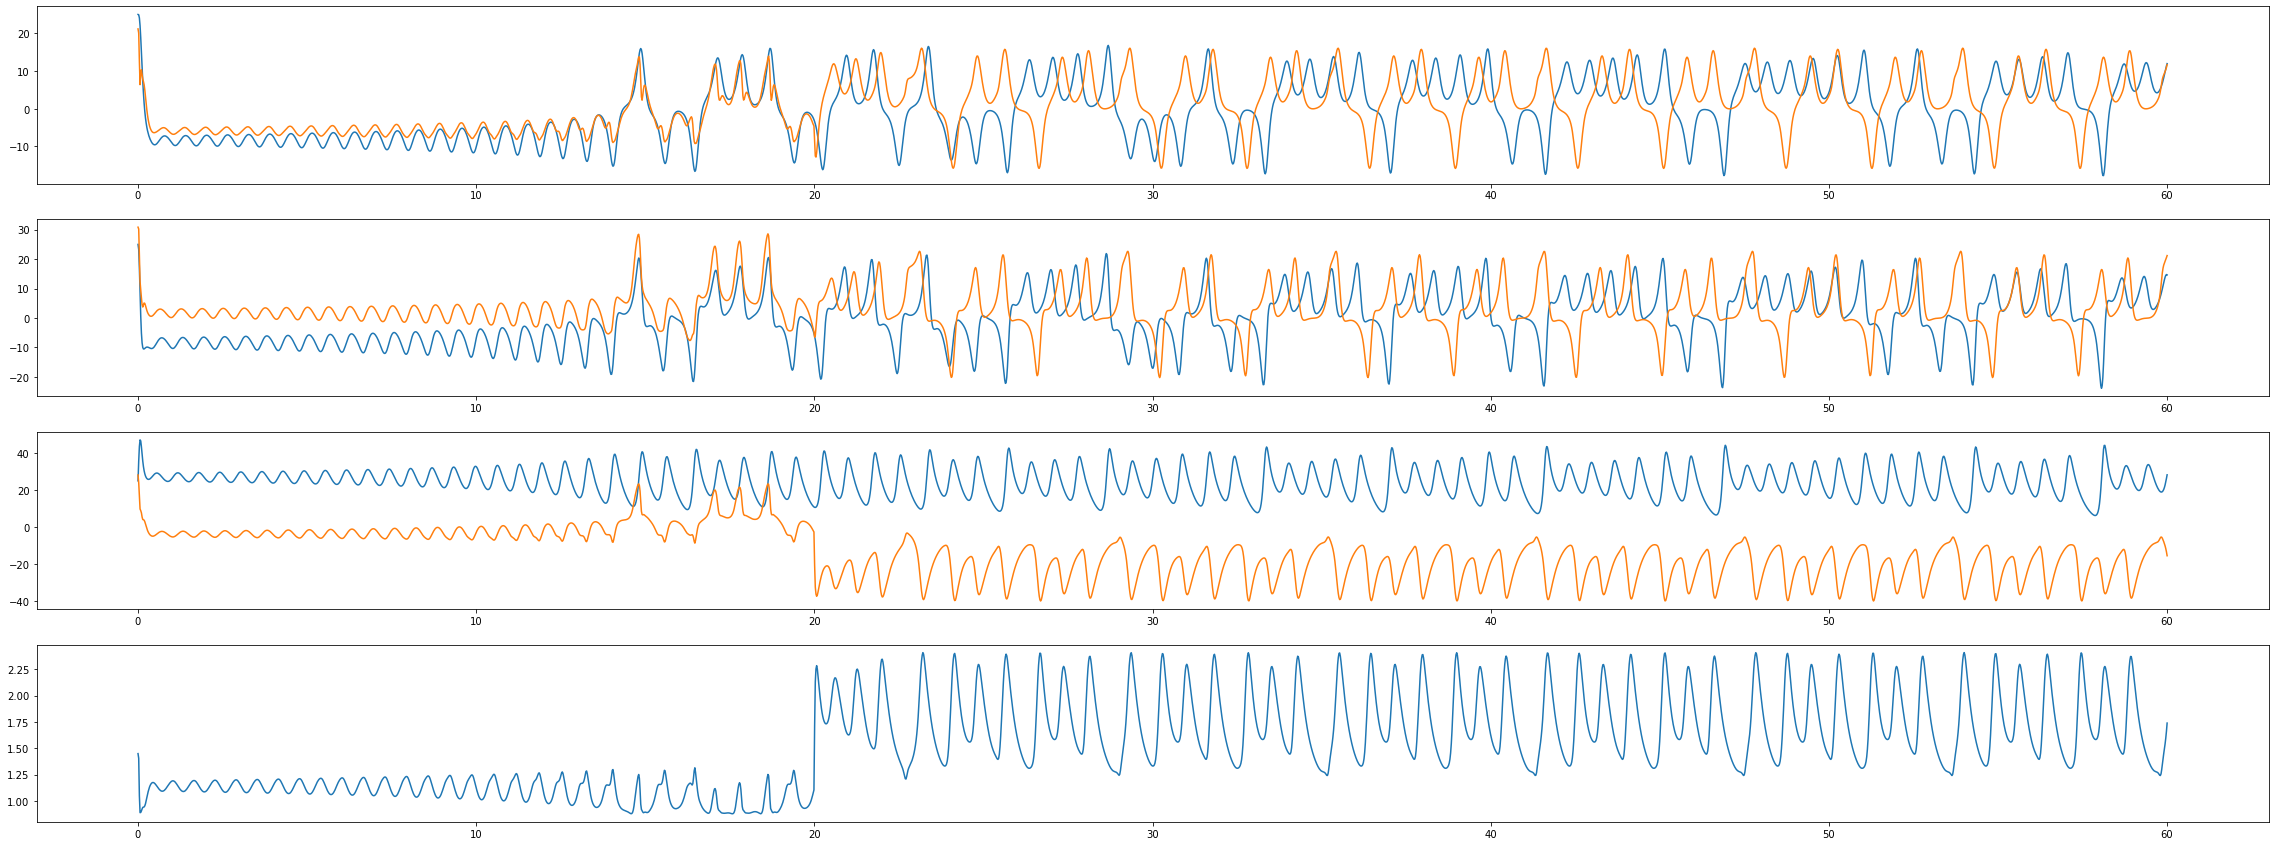

In [56]:
import torch
importlib.reload(utils)
#print(lorenz[0],output[0])
utils.plot_time_sequence(0,RP.run_time,RP.f,
                         torch.tensor(output),torch.tensor(lorenz).T,time,3)

# import numpy as np
# import matplotlib.pyplot as plt
# fig2=plt.figure()
# fig2.set_figwidth(40)
# fig2.set_figheight(15)

# print(output[0])
# plt.subplot(311)
# plt.plot(time[1000:1200],lorenz_x[1000:1200])
# plt.plot(time[1000:1200],(output.T[0][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[0][1005:1205])
# plt.subplot(312)
# plt.plot(time[1000:1200],lorenz_y[1000:1200])
# plt.plot(time[1000:1200],(output.T[1][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[1][1005:1205])
# plt.subplot(313)
# plt.plot(time[1000:1200],lorenz_z[1000:1200])
# plt.plot(time[1000:1200],(output.T[2][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[2][1005:1205])
# plt.show()

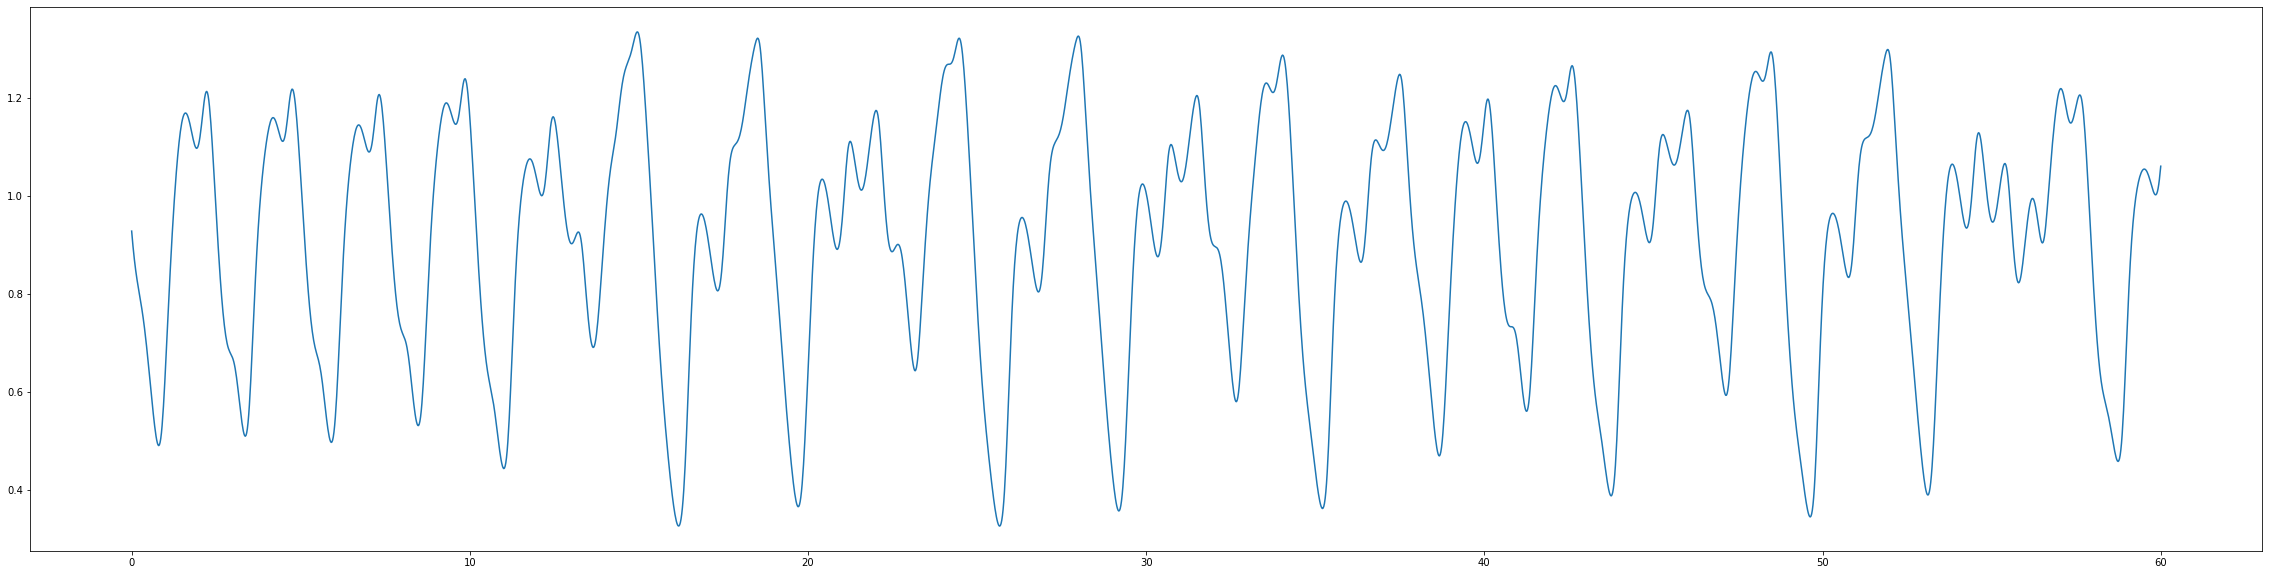

In [57]:
import utils
importlib.reload(utils)

sequence,time=utils.discrete_mackey_glass()
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_figwidth(40)
fig.set_figheight(10)
plt.plot(time,sequence)

In [58]:
import model
importlib.reload(model)

RP = model.reservoirModel('mackey_glass.config')
#print("W_out before_training:\n",RP.W_out)
RP.training()
#print("W_out after_training:\n",RP.W_out)

output,_=RP.run_by_self()

forced_output,_ = RP.run_with_input()

/home/bfish/projects/reservoir2/model.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(self.system_input[epoch])
/home/bfish/projects/reservoir2/model.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(torch.tensor(np.tanh(torch.tensor(np.dot(self.W_reservoir,prev))+torch.tensor(feed_to_reservoir))))
/home/bfish/projects/reservoir2/model.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reference_outputs = torch.tensor(self.system_input[1:self.training_time+1])
/home/bfish/projects/reserv

tensor([[-4.5029e-01, -4.7684e-01,  7.6411e-01,  ..., -1.0419e-10,
         -1.0300e-10, -1.0182e-10]], dtype=torch.float64) [0.9285897  0.91238089 0.8973491  ... 1.03416439 1.04684022 1.06119397]


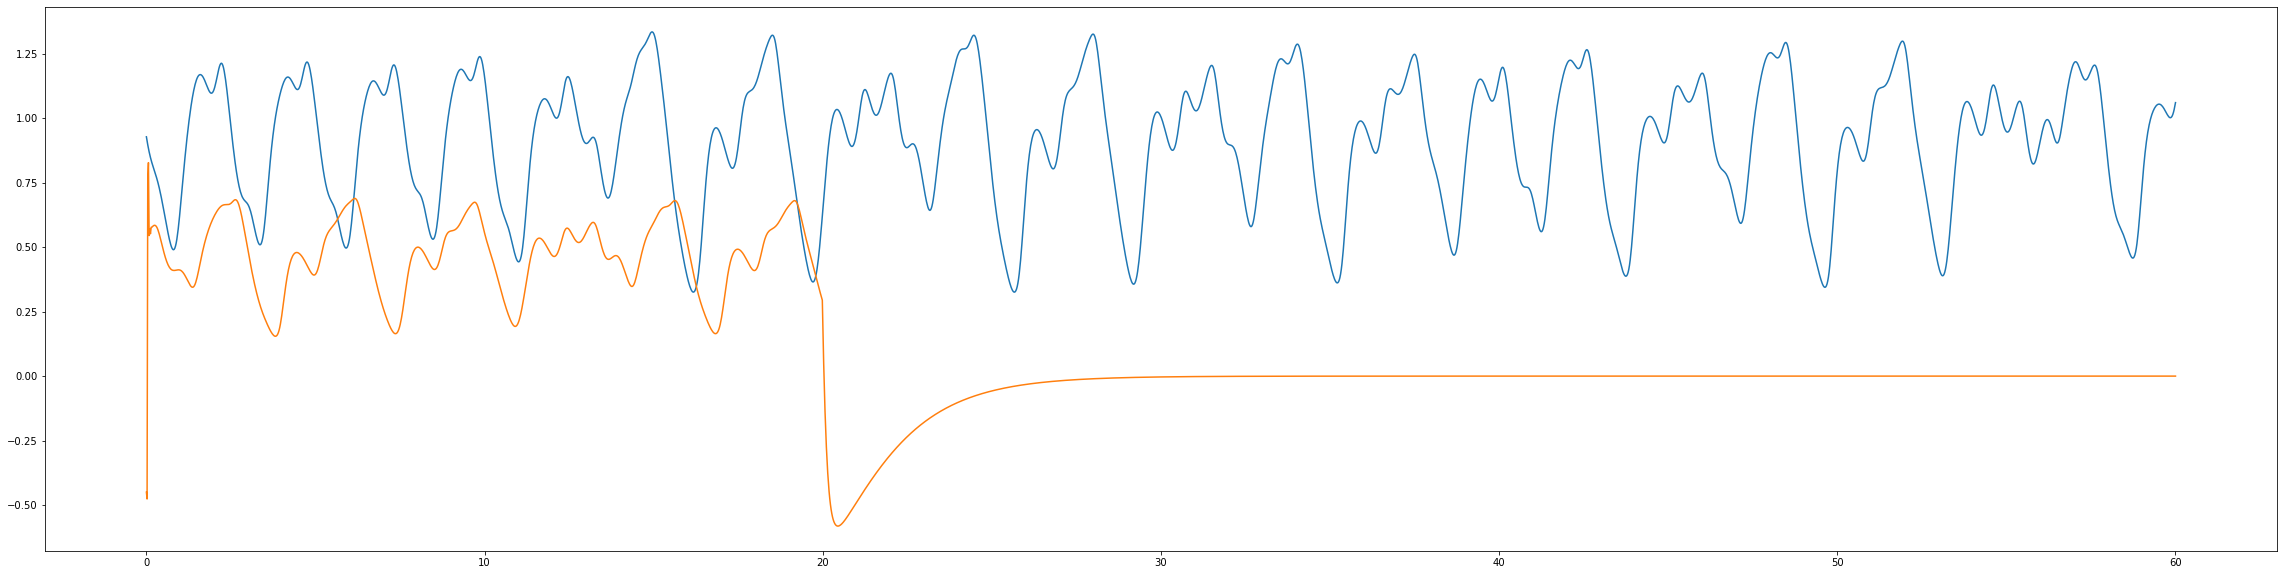

In [59]:
import torch
importlib.reload(utils)
print(output.T,sequence)
p = [torch.reshape(output.T,[-1])]
s = [sequence]

fig=plt.figure()
fig.set_figwidth(40)
fig.set_figheight(10)
plt.plot(time,sequence)
plt.plot(time,torch.reshape(output.T,[-1]))

#utils.plot_time_sequence(0,RP.run_time,RP.f,p,s,time,1)